# Generating random data for leaning

In [31]:
import numpy as np
import random

data_train = [random.randint(1, 100) for _ in range(10000)]

len(data_train)

10000

In [32]:
data_train = np.array(data_train)

data_train.shape

(10000,)

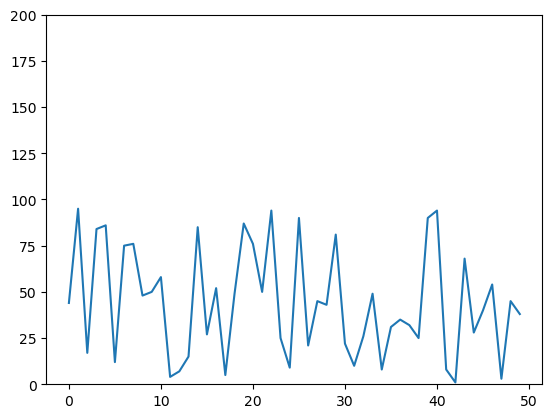

In [33]:
import matplotlib.pyplot as plt

plt.plot(data_train[:50])
plt.ylim([0, 200])
plt.show()

# Generating random data for Testing

In [34]:
data_test_normal = [random.randint(1, 100) for _ in range(100)]
data_test_anomaly = [random.randint(100, 200) for _ in range(100)]

data_test_normal = np.array(data_test_normal)
data_test_anomaly = np.array(data_test_anomaly)

data_test = np.concatenate((data_test_normal, data_test_anomaly))

data_test.shape

(200,)

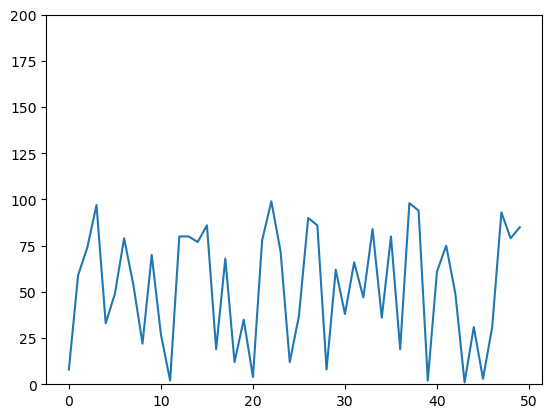

In [35]:
plt.plot(data_test[:50])
plt.ylim([0, 200])
plt.show()

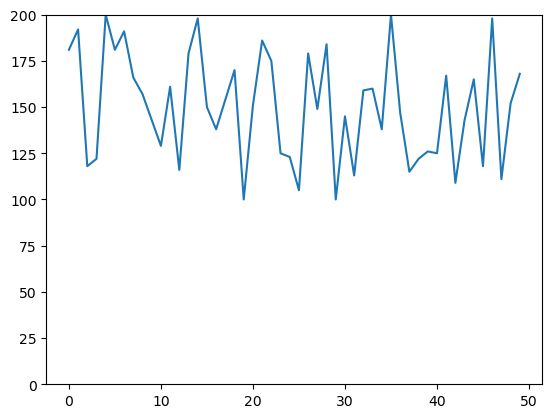

In [36]:
plt.plot(data_test[-50:])
plt.ylim([0, 200])
plt.show()

# Data Preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = scaler.fit_transform(data_train.reshape(-1, 1))
data_test = scaler.transform(data_test.reshape(-1, 1))

data_train.shape, data_test.shape

((10000, 1), (200, 1))

In [38]:
time_step = 1

time_step

1

In [39]:
data_train = data_train.reshape(-1, time_step, 1)
data_test = data_test.reshape(-1, time_step, 1)

data_train.shape, data_test.shape

((10000, 1, 1), (200, 1, 1))

# Developing model

In [40]:
from keras.models import Sequential
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(time_step, 1)))
model.add(RepeatVector(n=time_step))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(units=1)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 50)            0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 50)             20200     
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 1)             51        
 tributed)                                                       
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mae', optimizer='adam')

history = model.fit(x=data_train, y=data_train, epochs=50, validation_split=0.2)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.2144 - val_loss: 0.0132
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018

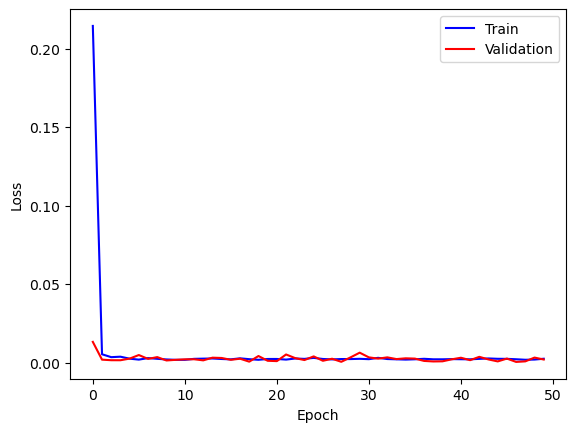

In [42]:
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get threshold

In [43]:
yhat_train = model.predict(data_train)

mae_train = np.mean(np.abs(yhat_train - data_train), axis=1)

mae_train.shape

313/313 [==============================] - 1s 976us/step


(10000, 1)

In [44]:
threshold = max(mae_train)

threshold

array([0.00452161])

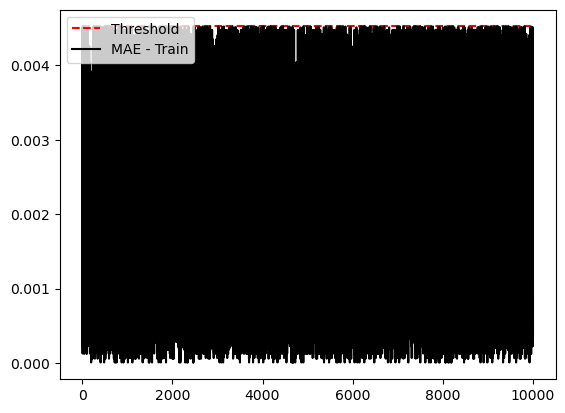

In [45]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_train), color='red', linestyles='--', label='Threshold')
plt.plot(mae_train, color='black', label='MAE - Train')
plt.legend()
plt.show()

# Visualize the result

In [46]:
yhat_test = model.predict(data_test)

mae_test = np.mean(np.abs(yhat_test - data_test), axis=1)

mae_test.shape

7/7 [==============================] - 0s 1ms/step


(200, 1)

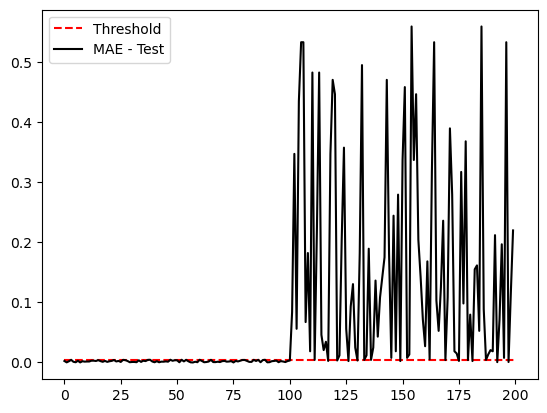

In [47]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_test), color='red', linestyles='--', label='Threshold')
plt.plot(mae_test, color='black', label='MAE - Test')
plt.legend()
plt.show()